<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/rnn/sin/RNNSin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

mpl.rcParams['lines.markersize'] = 0.5

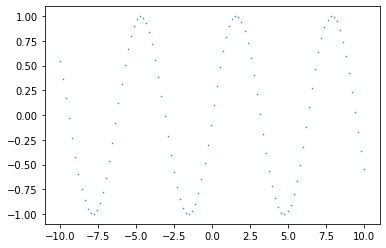

In [2]:
# pi/2 * 1 = 90
# pi/2 * 2 = 180
# pi/2 * 3 = 270
# pi/2 * 4 = 360
radians = np.linspace(-10, 10, 100)
data = np.sin(radians)
plt.scatter(radians, data)

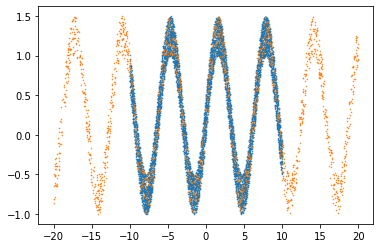

In [3]:
def get_input(start, end, num):
  x = start + np.random.random(num) * (end - start)
  y = np.sin(x) + np.random.random(num) * 0.5
  return x.reshape(-1, 1), y.reshape(-1, 1)

start = -10
end = 10
train_x, train_y = get_input(start, end, 8000)
test_x, test_y = get_input(start * 2, end * 2, 2000)

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

In [4]:
hidden_units = 32
time_steps = 4
input_dim = 1
model = models.Sequential()
model.add(layers.SimpleRNN(hidden_units, input_shape=(time_steps, input_dim), activation='tanh'))
model.add(layers.Dense(16))
model.add(layers.Dense(8))
model.add(layers.Dense(1))
model.compile(loss='mse', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [5]:
epochs = 100
history = model.fit(train_x, train_y, epochs=epochs, verbose=0)
test_loss, test_acc = model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 1ms/step - loss: 0.5253 - acc: 0.0000e+00


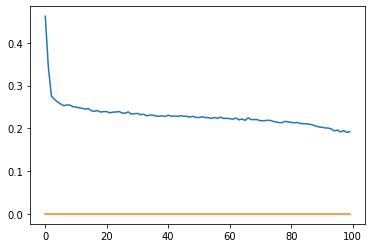

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.5253 - acc: 0.0000e+00


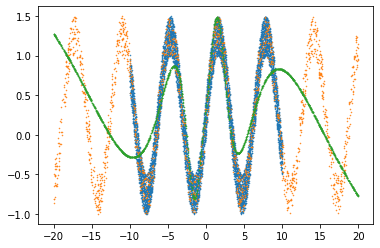

In [8]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

predicted_y = model.predict(test_x)
plt.scatter(test_x, predicted_y)